In [22]:
import pandas as pd
import pysam
from collections import Counter
import os

data_folder = '../data'

# Read the ClinVar VCF file with pyvcf
vcf_clinvar = pysam.VariantFile(f'{data_folder}/brca.vcf')
vcf_dir = f"{data_folder}/patients_vcf"

# Create an empty set to store variations from ClinVar
clinvar_variations = set()

# Iterate over each record in the VCF file
for record in vcf_clinvar.fetch():
    # Add the variation to the set (we're just recording the position, but you can modify this to include other details)
    clinvar_variations.add(str(record.pos))

# Initialize an empty dictionary to store variation frequencies for each patient
variation_freqs = {}

for file in os.listdir(vcf_dir):
    if file.endswith(".vcf"):
        # Open the VCF file with pysam
        vcf_patient = pysam.VariantFile(os.path.join(vcf_dir, file))

        # Create an empty list to store variations for this patient
        variations = []

        for record in vcf_patient.fetch():
            # Filter only variations that are in ClinVar
            if str(record.pos) in clinvar_variations:
                # Add the variation to the list of variations
                variations.append(str(record.pos))

        # Calculate the frequencies of variations for this patient and store them in the dictionary
        variation_freqs[file] = Counter(variations)

# Convert the dictionary into a DataFrame to display it more easily
df = pd.DataFrame.from_dict(variation_freqs, orient='index')

# Transpose the DataFrame (swap rows and columns)
df = df.transpose()

# Replace NaN values with 0
df = df.fillna(0)

# # Filter the DataFrame to only include rows where the count is more than 1 for any patient
# df = df[df.gt(1).any(axis=1)]

# Print the first few rows of the DataFrame
print(df)


          B177_Seq136.vcf  B191_Seq137.vcf  R129_Seq137.vcf  B187_Seq137.vcf  \
32900363              1.0              1.0              1.0              1.0   
32903565              1.0              1.0              0.0              1.0   
32903635              1.0              1.0              1.0              0.0   
32905046              1.0              1.0              1.0              1.0   
32905069              1.0              1.0              1.0              0.0   
...                   ...              ...              ...              ...   
41256878              0.0              0.0              0.0              0.0   
41246037              0.0              0.0              0.0              0.0   
41251814              0.0              0.0              0.0              0.0   
41267816              0.0              0.0              0.0              0.0   
41228647              0.0              0.0              0.0              0.0   

          B178_Seq136.vcf  B175_Seq136.

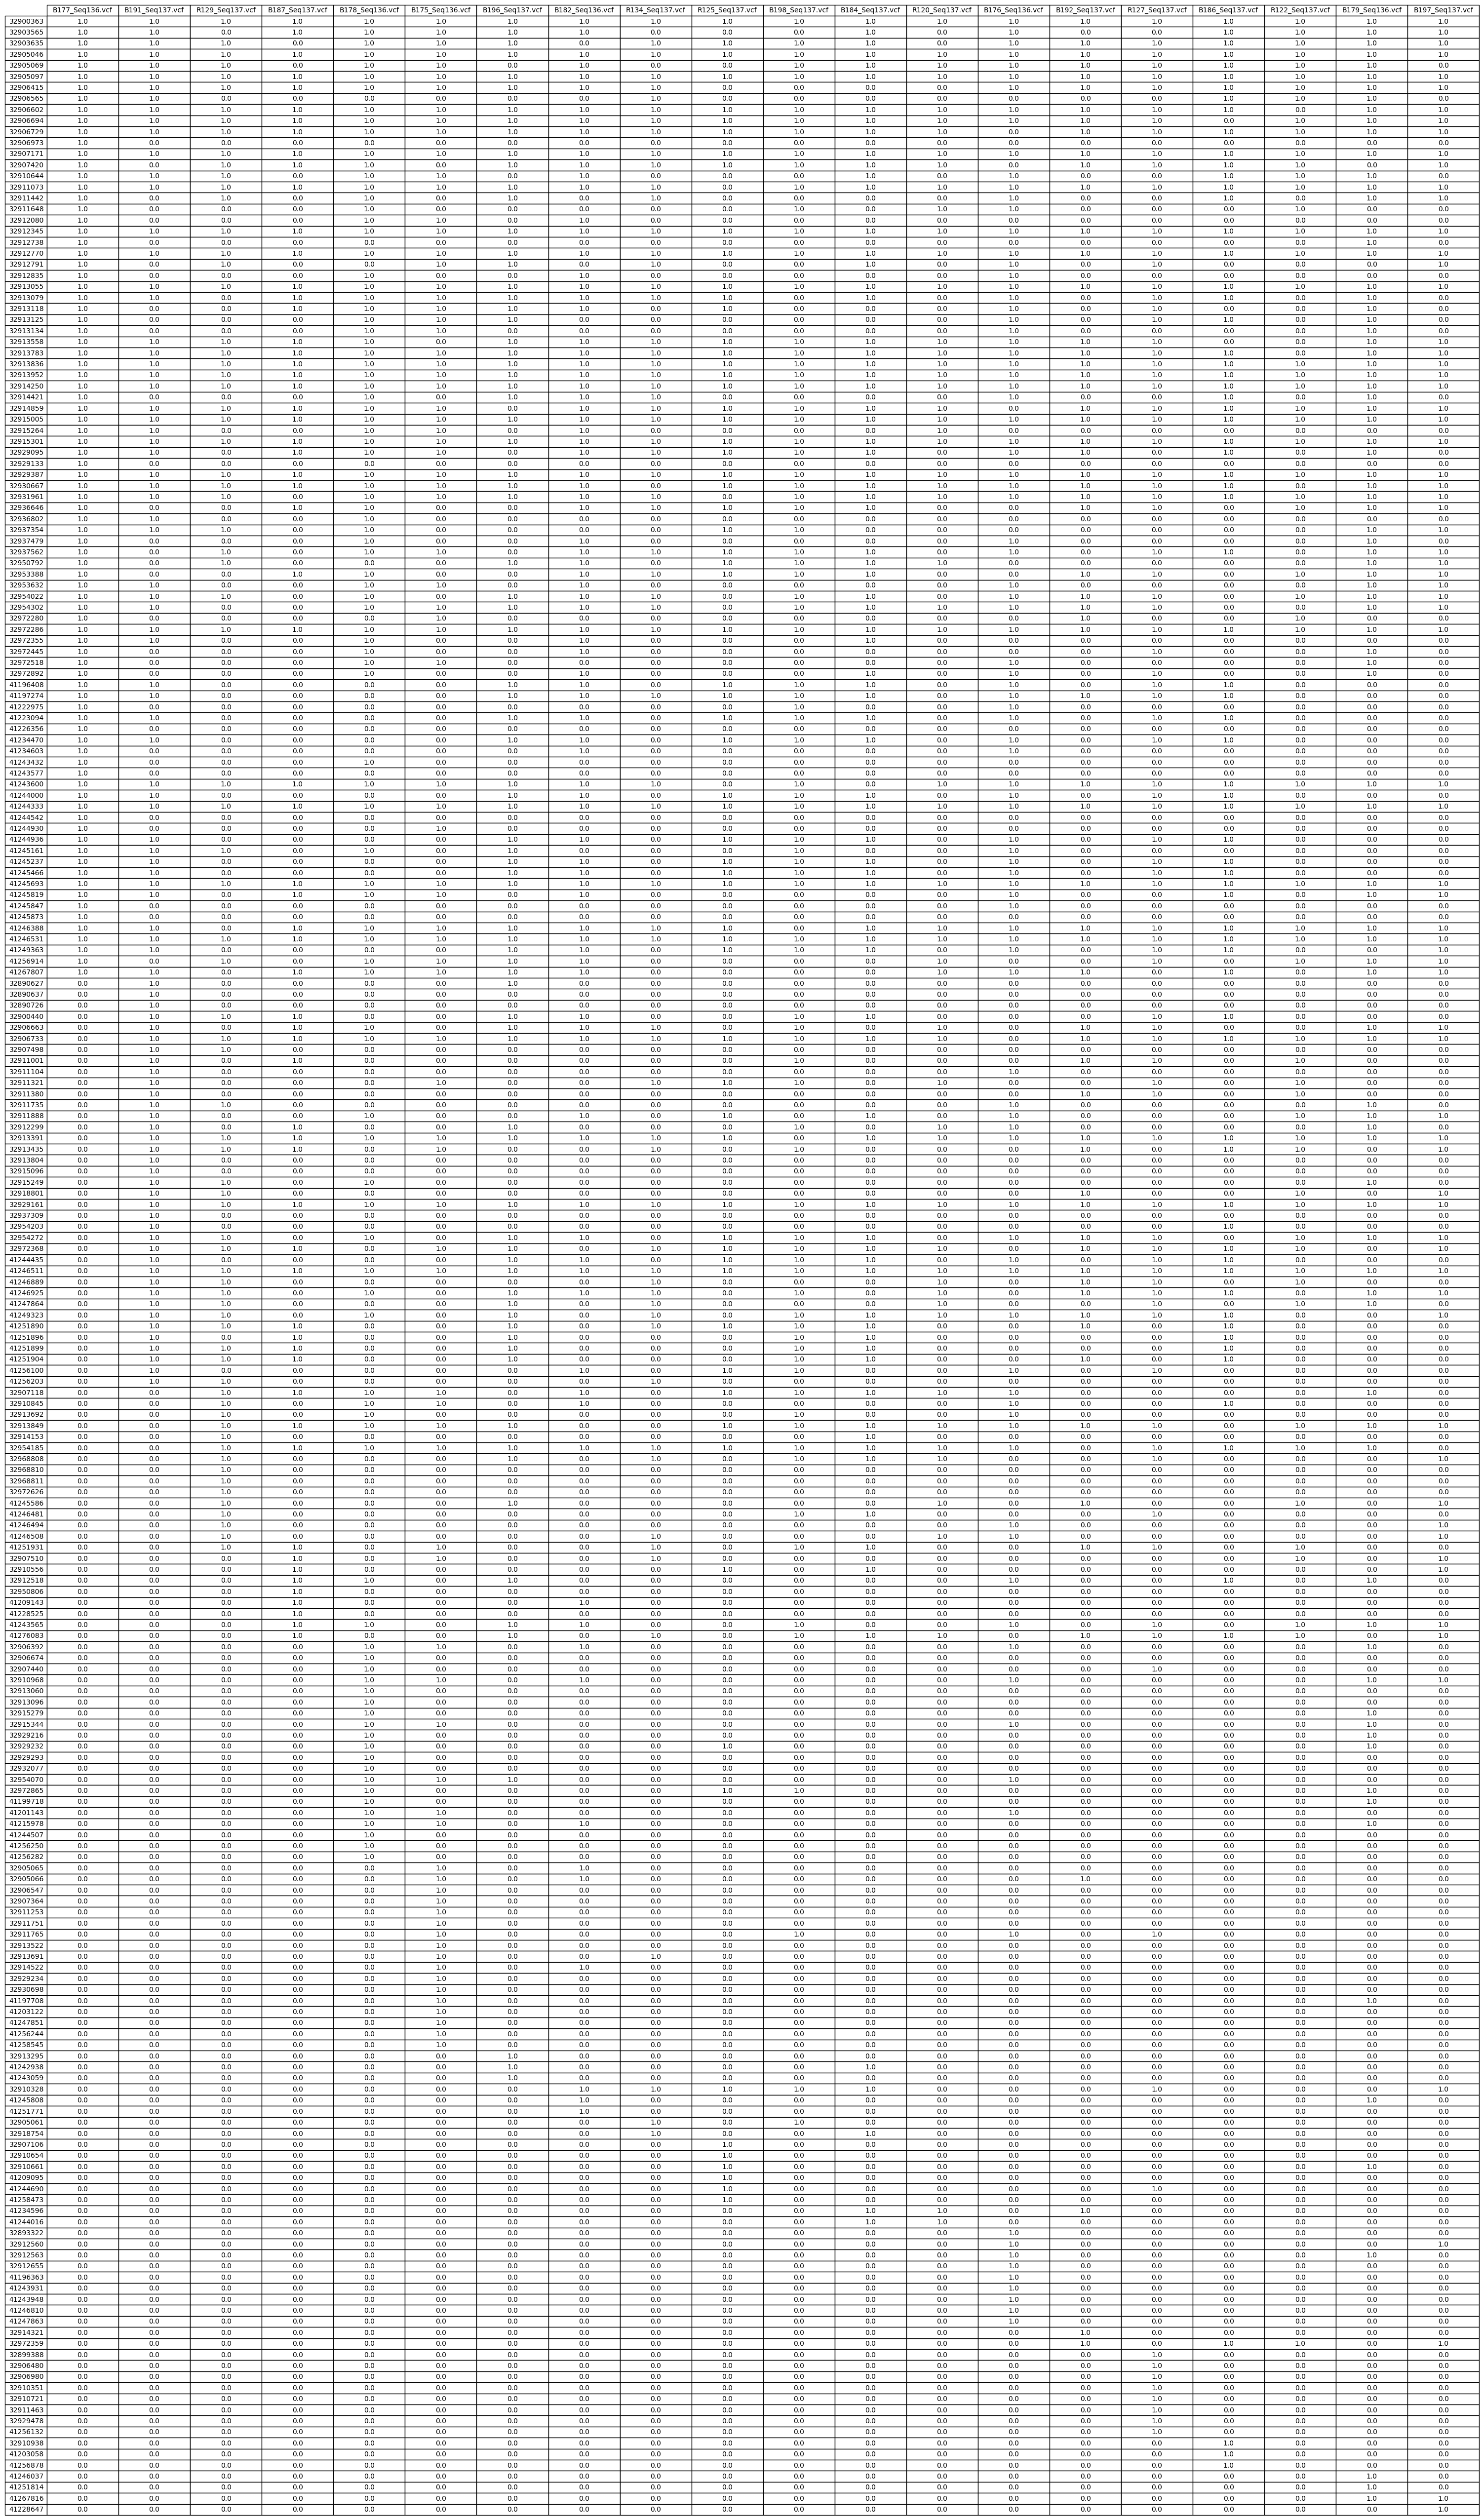

In [23]:
import matplotlib.pyplot as plt

# Create a new figure with a specific size
fig, ax = plt.subplots(figsize=(10, 10))

# Hide axes
ax.axis('off')

# Create a table and add it to the figure
table = plt.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, cellLoc = 'center', loc='center')

# Auto-adjust the width of the columns
table.auto_set_column_width(col=list(range(len(df.columns))))
table.scale(1, 1.5)

# Adjust the padding
plt.subplots_adjust(left=0.2, top=0.8)

# Save the figure
plt.savefig('table_pos.png', bbox_inches='tight', pad_inches=0.5)

In [12]:
import pandas as pd
import pysam
from collections import Counter
import os

data_folder = '../data'

# Read the ClinVar VCF file with pyvcf
vcf_clinvar = pysam.VariantFile(f'{data_folder}/brca.vcf')
vcf_dir = f"{data_folder}/patients_vcf"

# # Create an empty set to store variations from ClinVar
# clinvar_variations = set()
#
# # Iterate over each record in the VCF file
# for record in vcf_clinvar.fetch():
#     # Add the variation to the set (we're just recording the position, but you can modify this to include other details)
#     clinvar_variations.add(str(record.pos))

# Initialize an empty dictionary to store variation frequencies for each patient
variation_freqs = {}

for file in os.listdir(vcf_dir):
    if file.endswith(".vcf"):
        # Open the VCF file with pysam
        vcf_patient = pysam.VariantFile(os.path.join(vcf_dir, file))

        # Create an empty list to store variations for this patient
        variations = []

        for record in vcf_patient.fetch():
            # Filter only variations that are in ClinVar
            # if str(record.pos) in clinvar_variations:
                # Add the variation to the list of variations
            variations.append(str(record.pos))

        # Calculate the frequencies of variations for this patient and store them in the dictionary
        variation_freqs[file] = Counter(variations)

# Convert the dictionary into a DataFrame to display it more easily
df = pd.DataFrame.from_dict(variation_freqs, orient='index')

# Transpose the DataFrame (swap rows and columns)
df = df.transpose()

# Replace NaN values with 0
df = df.fillna(0)

# Filter the DataFrame to only include rows where the count is more than 1 for any patient
# df = df[df.gt(1).any(axis=1)]

# Print the first few rows of the DataFrame
print(df)


          B177_Seq136.vcf  R129_Seq137.vcf  B187_Seq137.vcf  B178_Seq136.vcf  \
32893180              1.0              1.0              1.0              1.0   
32900363              1.0              1.0              1.0              1.0   
32903565              1.0              0.0              1.0              1.0   
32903635              1.0              1.0              0.0              1.0   
32905046              1.0              1.0              1.0              1.0   
...                   ...              ...              ...              ...   
41251814              0.0              0.0              0.0              0.0   
41267816              0.0              0.0              0.0              0.0   
41267822              0.0              0.0              0.0              0.0   
41201245              0.0              0.0              0.0              0.0   
41228647              0.0              0.0              0.0              0.0   

          B175_Seq136.vcf  B196_Seq137.

In [14]:
import pandas as pd
import pysam
from collections import Counter
import os

vcf_clinvar = pysam.VariantFile(f'{data_folder}/brca.vcf')
vcf_dir = f"{data_folder}/patients_vcf"

# Create an empty dictionary to store variations and associated pathologies from ClinVar
clinvar_variations = {}

# Iterate over each record in the VCF file
for record in vcf_clinvar.fetch():
   if 'CLNDN' in record.info.keys():
        # Get the pathology from the CLNDN field
        pathology = record.info['CLNDN']
        # Add the variation to the dictionary with the associated pathology
        clinvar_variations[str(record.pos)] = pathology

# Initialize an empty dictionary to store variation frequencies for each patient
variation_freqs = {}

for file in os.listdir(vcf_dir):
    if file.endswith(".vcf"):
        # Open the VCF file with pysam
        vcf_patient = pysam.VariantFile(os.path.join(vcf_dir, file))

        # Create an empty dictionary to store variations for this patient
        variations = {}

        for record in vcf_patient.fetch():
            # Filter only variations that are in ClinVar
            if str(record.pos) in clinvar_variations:
                # Add the variation and its associated pathology to the dictionary of variations
                variations[clinvar_variations[str(record.pos)]] = variations.get(clinvar_variations[str(record.pos)], 0) + 1

        # Store the variation frequencies for this patient in the main dictionary
        variation_freqs[file] = variations

# Convert the dictionary into a DataFrame to display it more easily
df = pd.DataFrame.from_dict(variation_freqs, orient='index')

# Transpose the DataFrame (swap rows and columns)
df = df.transpose()

# Replace NaN values with 0
df = df.fillna(0)

# Filter the DataFrame to only include rows where the count is more than 1 for any patient
df = df[df.gt(1).any(axis=1)]

# Print the filtered DataFrame
print(df.head())


                                                                                                                                                  B177_Seq136.vcf  \
Breast-ovarian_cancer                              _familial         _susceptibility_to _2|Hereditary_breast_ovarian_cancer_syndrome NaN NaN NaN              2.0   
Hereditary_cancer-predisposing_syndrome|not_spe... _familial         _susceptibility_to _2                                           NaN NaN NaN              3.0   
Hereditary_breast_ovarian_cancer_syndrome          NaN               NaN                NaN                                          NaN NaN NaN             14.0   
Breast_and/or_ovarian_cancer|Hereditary_cancer-... _familial         _susceptibility_to _2                                           NaN NaN NaN              2.0   
Familial_cancer_of_breast                          NaN               NaN                NaN                                          NaN NaN NaN              6.0   
Hereditary

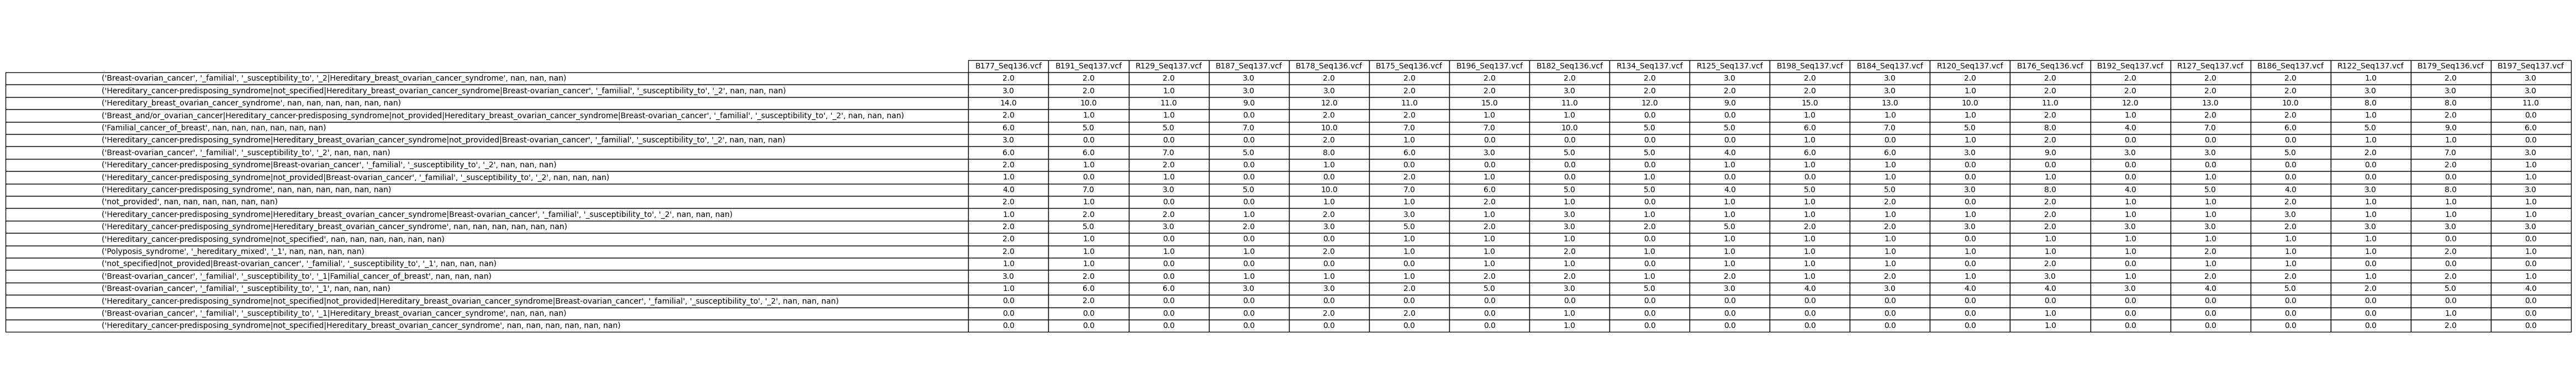

In [21]:
import matplotlib.pyplot as plt

# Create a new figure with a specific size
fig, ax = plt.subplots(figsize=(10, 10))

# Hide axes
ax.axis('off')

# Create a table and add it to the figure
table = plt.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, cellLoc = 'center', loc='center')

# Auto-adjust the width of the columns
table.auto_set_column_width(col=list(range(len(df.columns))))
table.scale(1, 1.5)

# Adjust the padding
plt.subplots_adjust(left=0.2, top=0.8)

# Save the figure
plt.savefig('table.png', bbox_inches='tight', pad_inches=0.5)

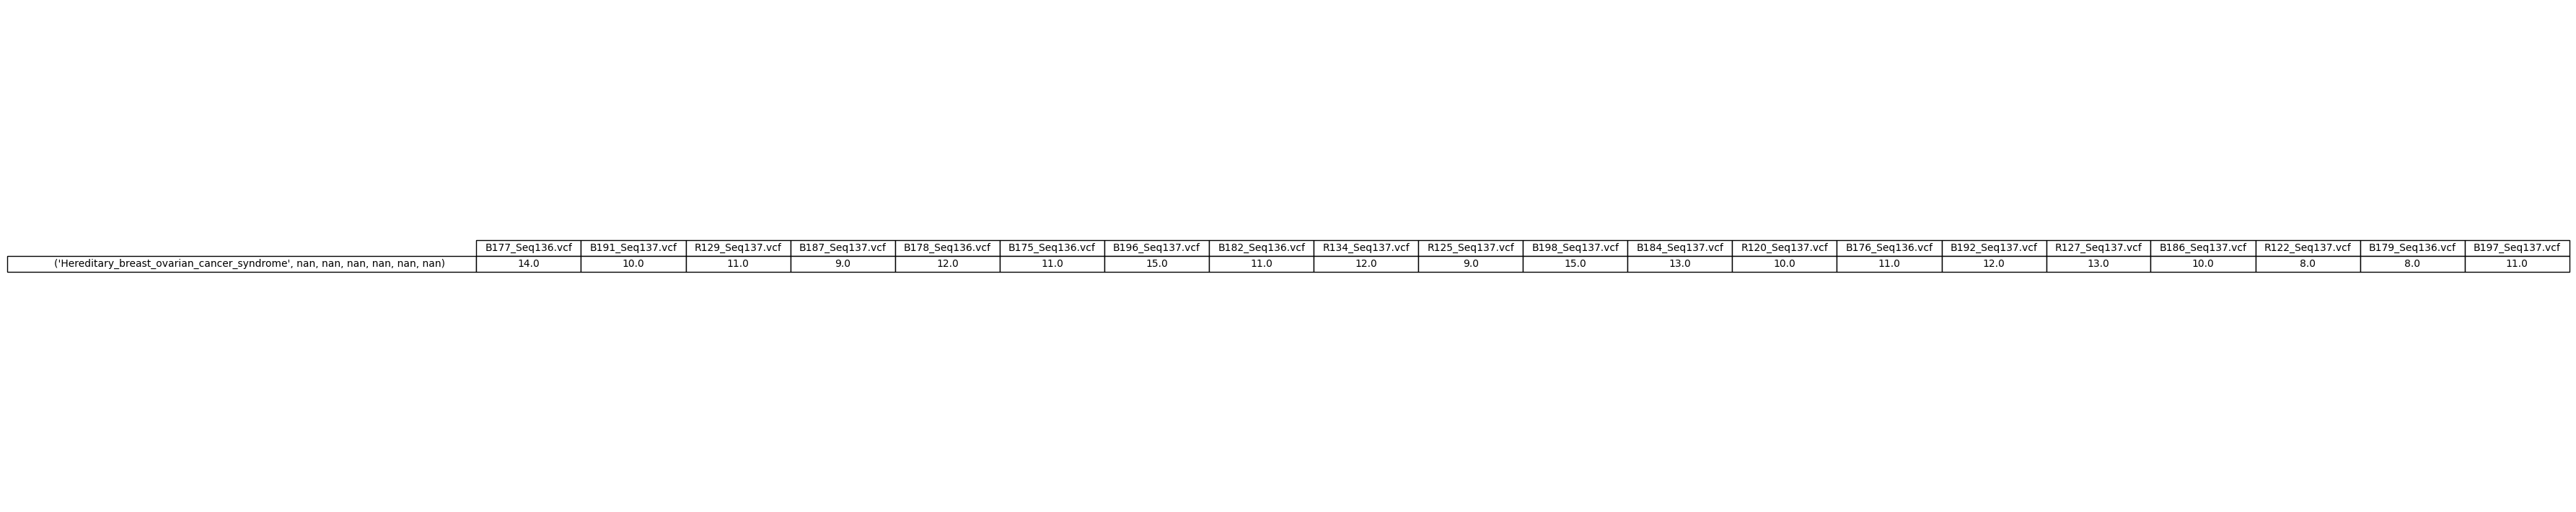

In [20]:
import matplotlib.pyplot as plt

df_10=df[df.gt(10).any(axis=1)]

# Create a new figure with a specific size
fig, ax = plt.subplots(figsize=(10, 10))

# Hide axes
ax.axis('off')

# Create a table and add it to the figure
table = plt.table(cellText=df_10.values, colLabels=df_10.columns, rowLabels=df_10.index, cellLoc = 'center', loc='center')

# Auto-adjust the width of the columns
table.auto_set_column_width(col=list(range(len(df_10.columns))))
table.scale(1, 1.5)

# Adjust the padding
plt.subplots_adjust(left=0.2, top=0.8)

# Save the figure
plt.savefig('table_10.png', bbox_inches='tight', pad_inches=0.5)

In [26]:
import pandas as pd
import pysam
import os
from collections import defaultdict

vcf_clinvar = pysam.VariantFile(f'{data_folder}/brca.vcf')
vcf_dir = f"{data_folder}/patients_vcf"

# Create an empty dictionary to store variations and their locations from ClinVar
clinvar_variations = {}

# Iterate over each record in the VCF file
for record in vcf_clinvar.fetch():
    # Check if the record has the MC field
    if 'MC' in record.info.keys():
        # Get the location from the MC field (intron or exon)
        location = 'intron' if 'intron_variant' in record.info['MC'] else 'exon'
        # Add the variation to the dictionary with its location
        clinvar_variations[str(record.pos)] = location

# Initialize a dictionary to store variation locations for each patient
patient_variations = defaultdict(lambda: defaultdict(int))

for file in os.listdir(vcf_dir):
    if file.endswith(".vcf"):
        # Open the VCF file with pysam
        vcf_patient = pysam.VariantFile(os.path.join(vcf_dir, file))

        for record in vcf_patient.fetch():
            # Filter only variations that are in ClinVar
            if str(record.pos) in clinvar_variations:
                # Increase the count for this variation's location
                patient_variations[file][clinvar_variations[str(record.pos)]] += 1

# Convert the dictionary into a DataFrame to display it more easily
df = pd.DataFrame.from_dict(patient_variations, orient='index')

# Replace NaN values with 0
df = df.fillna(0)

# Print the DataFrame
print(df)


                 exon
B175_Seq136.vcf    85
B176_Seq136.vcf    98
B177_Seq136.vcf    87
B178_Seq136.vcf   100
B179_Seq136.vcf    90
B182_Seq136.vcf    89
B184_Seq137.vcf    80
B186_Seq137.vcf    73
B187_Seq137.vcf    63
B191_Seq137.vcf    92
B192_Seq137.vcf    64
B196_Seq137.vcf    81
B197_Seq137.vcf    73
B198_Seq137.vcf    82
R120_Seq137.vcf    57
R122_Seq137.vcf    59
R125_Seq137.vcf    68
R127_Seq137.vcf    89
R129_Seq137.vcf    75
R134_Seq137.vcf    66


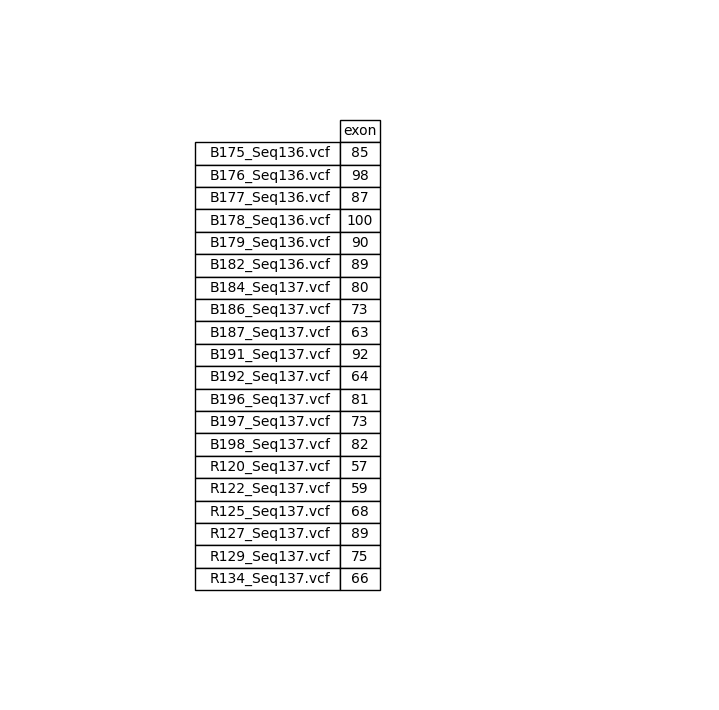

In [27]:
import matplotlib.pyplot as plt

# Create a new figure with a specific size
fig, ax = plt.subplots(figsize=(10, 10))

# Hide axes
ax.axis('off')

# Create a table and add it to the figure
table = plt.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, cellLoc = 'center', loc='center')

# Auto-adjust the width of the columns
table.auto_set_column_width(col=list(range(len(df.columns))))
table.scale(1, 1.5)

# Adjust the padding
plt.subplots_adjust(left=0.2, top=0.8)

# Save the figure
plt.savefig('table_loc.png', bbox_inches='tight', pad_inches=0.5)